HW PCA Analizi İle Model Kurma

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as plt
import seaborn as plot
import scipy.stats as stats

In [3]:
data= pd.read_excel( 'HW_Data_Set.xlsx', sheet_name = 'Sheet1')
print(data.head())

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [4]:
df=data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


3 object değişkenimiz vardı bu object olan değişkenler hangisi olduğuna baktık

In [6]:
colum=df.columns

num_cols=df._get_numeric_data().columns
CAT=set(colum)-set(num_cols)
CAT

{'ind_109', 'ind_420', 'ind_422'}

In [42]:
df['ind_109'].head()
#bu değişkenleri 
#green=0  , red=1 olarak sınıflandıralım


KeyError: 'ind_109'

In [8]:
dms= pd.get_dummies(df['ind_109'])
dms.head()
#kategorik değişkeni dummy olarak çevirdik

,GREEN,RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [9]:
X_=df.drop(['ind_109'],axis=1)
X_.head()
#kategorik değişkeni datadan sildik

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
df=pd.concat([X_,dms], axis=1)
#dummy olmuş değişkeni yeni haliyle yeniden data setine ekledik

In [11]:
df.info()
#datada artık 2 object değişken görünüyor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 137 entries, ind_5 to RED
dtypes: float64(88), int64(45), object(2), uint8(2)
memory usage: 6.4+ MB


In [12]:
df=df.replace('?',np.nan)

In [13]:
#df['ind_420'].tail(15)
#df['ind_422'].head(15)
#diğer object olarak görünen değişkenler bunun içindeki ? nan yapalım

In [14]:
df = df.dropna(axis=0, subset=['ind_420'])

In [15]:
df = df.dropna(axis=0, subset=['ind_422'])
#satır bazında na olan değerleri sildik

In [16]:
df["ind_420"].isnull().sum(axis=0)
#satır bazında na olan değerlerin toplamına baktık

0

In [83]:
df["ind_422"].isnull().sum(axis=0)

0

In [84]:
df.info()
#artık datamızda object olarak görünen değişkenimiz yok

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 137 entries, ind_5 to RED
dtypes: float64(90), int64(47)
memory usage: 5.4 MB


 TÜM DEĞİŞKENLERİMİZ NÜMERİK HALE GELDİ PCA ANALİZİNE GEÇELİM 

PCA Kütüphaneleri

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()
#PCA() tüm x bileşenleri alması için component sayısı belirtmedik

In [18]:
#veriyi test train olarak ayırmak için kullandığımız kütüphane
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [19]:
y=df['90_target']
X=df.drop(['20_target','50_target','90_target'],axis=1)
X.head()
#Hedef değişkenimizi 90_Target olarak belirledik ve diğer hedef değişkenlerini datadan sildik

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,GREEN,RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,-152.0,-353.0,1.0,0.498547,0.701906,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,-158.0,-359.0,1.0,0.537088,0.690833,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,-160.0,-362.0,1.0,0.615169,0.693040,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,-166.0,-367.0,1.0,0.661517,0.673418,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,-186.0,-388.0,1.0,0.747204,0.700522,1,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (3844, 134)
y_train (3844,)
X_test (1282, 134)
y_test (1282,)
training (5126, 137)


In [21]:
#burada hem x_train değişkenine göre model kurdu  hemde boyut indirgemesi yaptı
#yalnızca fit deseydik boyut indirgemeden model fit ederdi
X_reduced_train = pca.fit_transform(scale(X_train))


In [22]:
#modeldeki bileşenlerin varyanslarının birikimli açıklama oranlarına bakalım
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:15]
#model kurarken 15 bileşen kullanırsak verideki hareketin yaklaşık %81 ini açıklayabiliyoruz
#ama PCA kendisi yeni component oluşturduğu için hangi değişkenleri kullanarak modeli oluşturduğumuzun cevabını veremeyiz

array([36.82, 49.22, 55.03, 59.47, 62.8 , 65.68, 68.25, 70.26, 72.12,
       73.83, 75.42, 76.88, 78.25, 79.53, 80.74])

([<matplotlib.axis.XTick at 0x23bb42e85c0>,
 <a list of 134 Text xticklabel objects>)

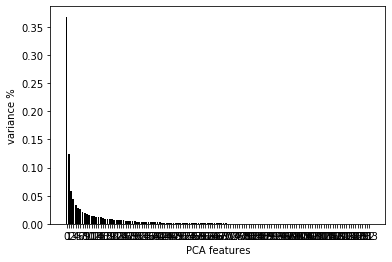

In [23]:
#componentlerin açıklama oranlarının grafiği
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

pca=PCA(n_components=15)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

r2_score(y_train, y_pred)

MODEL KURALIM 

In [24]:
#kullanacağımız kütüphane
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [43]:
#pcr_model.coef_

TAHMİN

In [38]:
#kurduğumuz modele dönüştürdüğümüz x_train leri vererek y değeri tahmini yaptık
y_pred = pcr_model.predict(X_reduced_train)

In [39]:
y_pred[0:5]

array([ -2.49749466, -13.76709693,  27.85000824, -12.29491759,
         3.67182448])

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, y_pred)
#modelin açıklama oranı %21 düşük olarak bulduk

0.21745248392379535

In [ ]:
# y= 90_target için r2=0.2174
# y= 50_Target için r2=0.2148
# y= 20_Target için r2=0.103

In [32]:
pca2 = PCA()

In [33]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [34]:
y_pred = pcr_model.predict(X_reduced_test)

In [37]:
r2_score(y_test, y_pred)

-0.15314501839494943

In [ ]:
buraya kadar olan kısımda tüm componentleri kullanarak model kurduk
(pca() olarak model kurduğumuzda tüm componentleri kullanır)

MODEL TUNING
Model için uygun olan hiperparametrenin bulunmuş olduğu kısım

In [232]:
# Burada kaç bileşenle model kurmak istediğimizi belirteceğiz

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:15], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:15])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

37.57087486380192


In [146]:
#from sklearn import model_selection

In [233]:
#burada modeli k kadar çaprazlama ile test ediyoruz. biz k=10 olarak belirledik yani tüm veri setini 10 parçaya bölecek 
#daha sonra k kadar adım adım çapraz şekilde bu verisetini bölüp test ve train edicek
#sistemin başarısınıda k ların ortalamasını alarak bulacak

cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
#shuffle gruplara ayrılsın mı ayrılmasın mı onu belirtir

In [234]:
lm = LinearRegression()

In [235]:
RMSE = []
#10 parçaya böldüğü veri setinin tamamınde rmse buldu ve bir listenin içine atadı

In [236]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)
    
#listenin içindeki rmse ortalamalarını aldı

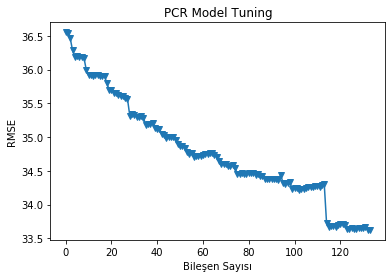

In [237]:
#hatalara bakarak kaç bileşen kullanmalıyız bize onu verir
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');
#modeli kurarken 110dan fazla bileşen kullandığımız takdirde en küçük hatayı yakalayabiliriz

In [272]:
lm = LinearRegression()

In [273]:
pcr_model = lm.fit(X_reduced_train[:,0:13], y_train) # burada x in kaç component kullanarak model kurulacagını belirtiyoruz
#en yüksek r2 veren model bizim için en iyi modeldir

In [274]:
y_pred = pcr_model.predict(X_reduced_train[:,0:13])

In [275]:
r2_score(y_train, y_pred)

0.04566719997479729